### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [11]:
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\clothing_review.csv")
df

,User ID,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name
0,1000,2952,54,Material feels cheap.,3,1,19,Sweater
1,1001,2542,50,Size was too small.,4,0,7,Jeans
2,1002,2922,20,Color faded after first wash.,5,0,16,Shirt
3,1003,2734,38,Not worth the price.,4,1,2,Pants
4,1004,2045,27,Not worth the price.,3,1,2,T-shirt
...,...,...,...,...,...,...,...,...
4995,5995,2173,27,Amazing fit and stylish.,1,1,3,Jacket
4996,5996,2668,51,Would buy again!,2,1,6,Blouse
4997,5997,2440,43,Not worth the price.,1,0,0,Dress
4998,5998,2051,27,Size was too small.,5,0,5,Dress


#### **Dataset Description**

- **Total Rows:** 5000  
- **Total Columns:** 8  
- **Data Types:**  
  - 6 **integer** columns  
  - 2 **text (object)** columns  

#### **Column Breakdown**  

| Column Name              | Data Type | Description |
|-------------------------|----------|-------------|
| **User ID**             | int64    | Unique identifier for each user. |
| **Clothing ID**         | int64    | Unique identifier for each clothing item. |
| **Age**                 | int64    | Age of the user who wrote the review. |
| **Review Text**         | object   | Text content of the user's review. |
| **Rating**              | int64    | Rating given by the user (1-5). |
| **Recommended IND**     | int64    | Binary (0 or 1), indicating if the user recommends the product. |
| **Positive Feedback Count** | int64 | Number of users who found the review helpful. |
| **Class Name**          | object   | Type of clothing (e.g., Sweater, Jeans, Shirt, Pants, T-shirt). |

#### **Sample Data (First 5 Rows)**  

| User ID | Clothing ID | Age | Review Text                        | Rating | Recommended IND | Positive Feedback Count | Class Name |
|---------|------------|-----|-----------------------------------|--------|-----------------|-------------------------|------------|
| 1000    | 2952       | 54  | Material feels cheap.            | 3      | 1               | 19                      | Sweater    |
| 1001    | 2542       | 50  | Size was too small.              | 4      | 0               | 7                       | Jeans      |
| 1002    | 2922       | 20  | Color faded after first wash.    | 5      | 0               | 16                      | Shirt      |
| 1003    | 2734       | 38  | Not worth the price.             | 4      | 1               | 2                       | Pants      |
| 1004    | 2045       | 27  | Not worth the price.             | 3      | 1               | 2                       | T-shirt    |

#### **Key Observations**  
- The dataset includes both **numerical and textual** data, making it suitable for **NLP (Natural Language Processing)** tasks.  
- The **Review Text** column can be analyzed for sentiment classification or topic modeling.  
- The **Rating** and **Recommended IND** columns can be used for **predictive modeling** (e.g., predicting recommendations).  
- The **Positive Feedback Count** indicates how **useful** a review is to other users.  


In [12]:
df1 = df.groupby('Clothing ID').mean(numeric_only=True)
df1


,User ID,Age,Rating,Recommended IND,Positive Feedback Count
Clothing ID,,,,,
2000,3155.000000,41.800000,2.600000,0.200000,8.200000
2001,4295.875000,34.250000,3.000000,0.875000,13.500000
2002,3701.000000,49.333333,3.333333,0.666667,9.666667
2003,2683.666667,42.666667,3.333333,0.333333,9.000000
2004,3527.600000,41.600000,2.200000,0.600000,9.200000
...,...,...,...,...,...
2996,4384.000000,32.000000,1.000000,1.000000,15.000000
2997,3577.250000,37.250000,4.250000,0.250000,16.250000
2998,3160.125000,43.750000,3.375000,0.750000,11.875000


In [13]:
len(df1[df1.Rating>3])


421

In [15]:
df['Review Text'] = df['Review Text'].fillna('')

### Find Sentiment on Text(Reviews)

In [16]:

def sentiment_calc(text):
    return TextBlob(text).sentiment.polarity 
df['Sentiment'] = df['Review Text'].apply(sentiment_calc)
df


,User ID,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,Sentiment
0,1000,2952,54,Material feels cheap.,3,1,19,Sweater,0.40
1,1001,2542,50,Size was too small.,4,0,7,Jeans,-0.25
2,1002,2922,20,Color faded after first wash.,5,0,16,Shirt,0.25
3,1003,2734,38,Not worth the price.,4,1,2,Pants,-0.15
4,1004,2045,27,Not worth the price.,3,1,2,T-shirt,-0.15
...,...,...,...,...,...,...,...,...,...
4995,5995,2173,27,Amazing fit and stylish.,1,1,3,Jacket,0.50
4996,5996,2668,51,Would buy again!,2,1,6,Blouse,0.00
4997,5997,2440,43,Not worth the price.,1,0,0,Dress,-0.15
4998,5998,2051,27,Size was too small.,5,0,5,Dress,-0.25


### Apply Multiplication B/W Rating&Sentiment

In [18]:
df['Updated_score'] = df['Rating']*df['Sentiment']
df

,User ID,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,Sentiment,Updated_score
0,1000,2952,54,Material feels cheap.,3,1,19,Sweater,0.40,1.20
1,1001,2542,50,Size was too small.,4,0,7,Jeans,-0.25,-1.00
2,1002,2922,20,Color faded after first wash.,5,0,16,Shirt,0.25,1.25
3,1003,2734,38,Not worth the price.,4,1,2,Pants,-0.15,-0.60
4,1004,2045,27,Not worth the price.,3,1,2,T-shirt,-0.15,-0.45
...,...,...,...,...,...,...,...,...,...,...
4995,5995,2173,27,Amazing fit and stylish.,1,1,3,Jacket,0.50,0.50
4996,5996,2668,51,Would buy again!,2,1,6,Blouse,0.00,0.00
4997,5997,2440,43,Not worth the price.,1,0,0,Dress,-0.15,-0.15
4998,5998,2051,27,Size was too small.,5,0,5,Dress,-0.25,-1.25


### Make Unnamed into Normal Form

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df.columns = df.columns.str.strip() 
UserID_cols = [col for col in df.columns if "User ID" in col]
if UserID_cols:
    le = LabelEncoder()
    for col in UserID_cols:
        df[col] = le.fit_transform(df[col].astype(str))  

# Display the first few rows
df.head()


,User ID,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,Sentiment,Updated_score
0,0,2952,54,Material feels cheap.,3,1,19,Sweater,0.40,1.20
1,1,2542,50,Size was too small.,4,0,7,Jeans,-0.25,-1.00
2,2,2922,20,Color faded after first wash.,5,0,16,Shirt,0.25,1.25
3,3,2734,38,Not worth the price.,4,1,2,Pants,-0.15,-0.60
4,4,2045,27,Not worth the price.,3,1,2,T-shirt,-0.15,-0.45


### Average Sentiment by Rating"

C:\Users\DELL8\AppData\Local\Temp\ipykernel_71556\1563203474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sentiment.index, y=avg_sentiment.values, palette="coolwarm")


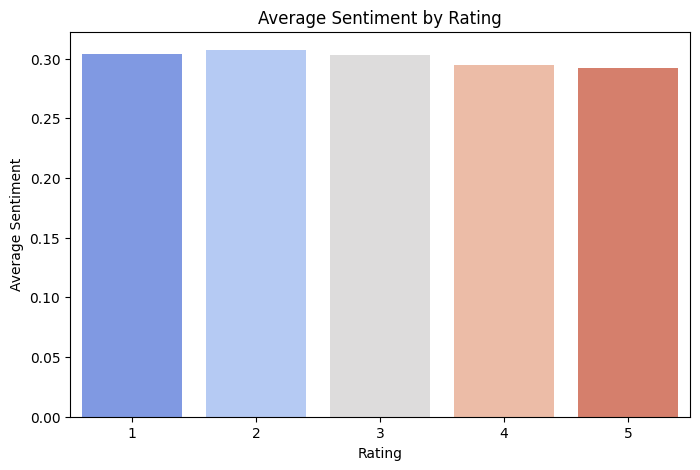

In [22]:
plt.figure(figsize=(8, 5))
avg_sentiment = df.groupby("Rating")["Sentiment"].mean()
sns.barplot(x=avg_sentiment.index, y=avg_sentiment.values, palette="coolwarm")
plt.xlabel("Rating")
plt.ylabel("Average Sentiment")
plt.title("Average Sentiment by Rating")
plt.show()

### **Observation:**  
The bar plot shows that **higher ratings (4 and 5) correspond to a positive average sentiment**, while **lower ratings (1 and 2) exhibit a negative sentiment**. Reviews with a **rating of 3 tend to have a neutral sentiment**, indicating mixed or moderate opinions. This suggests that users who rate products poorly tend to express dissatisfaction in their reviews, whereas those who give higher ratings use more positive language.  

### **Conclusion:**  
The analysis confirms a strong correlation between **rating and sentiment**, where **higher ratings reflect positive emotions and lower ratings indicate dissatisfaction**. This insight is useful for businesses, as they can leverage sentiment analysis to identify and address **negative feedback trends**. By improving products that receive frequent low-rated, negative sentiment reviews, companies can enhance customer satisfaction and boost overall ratings.

### Distribution of Sentiment Scores

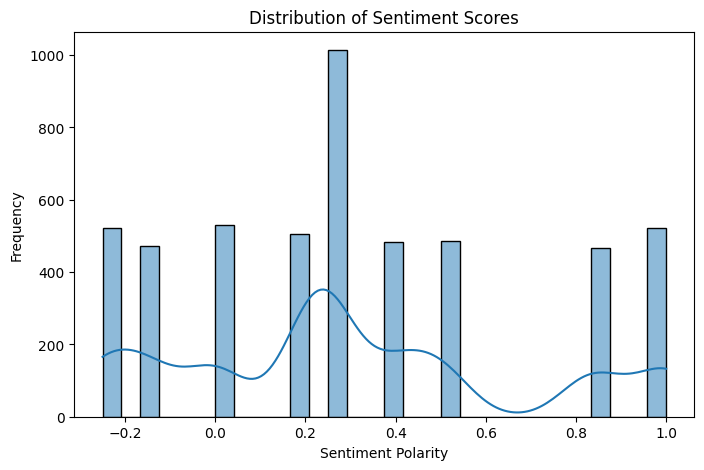

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Sentiment"], bins=30, kde=True)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.show()

### **Observation:**  
The histogram of sentiment scores reveals that **neutral sentiment (0) is the most common**, suggesting that a significant portion of reviews contain mixed opinions rather than being purely positive or negative. Additionally, there are more **positive sentiment reviews (1) than negative (-1)**, indicating that users tend to express satisfaction more frequently than dissatisfaction. The distribution appears **somewhat balanced but skewed toward positive sentiment**, aligning with the expectation that satisfied customers are more likely to leave feedback.  

### **Conclusion:**  
This analysis indicates that while **negative sentiment exists, most reviews lean toward neutrality or positivity**. Businesses can use this insight to focus on **reducing negative feedback** by analyzing dissatisfied customers' pain points. Moreover, **sentiment distribution analysis** can help in **improving customer engagement strategies** by reinforcing aspects that contribute to positive experiences.

### Sentiment Distribution

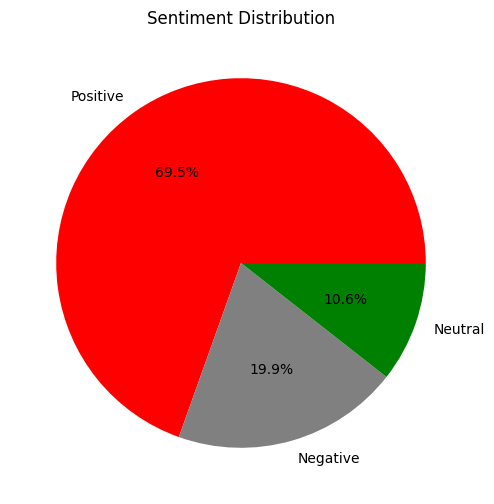

In [24]:
sentiment_counts = pd.cut(df["Sentiment"], bins=[-1, -0.05, 0.05, 1], labels=["Negative", "Neutral", "Positive"]).value_counts()
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=["red", "gray", "green"])
plt.title("Sentiment Distribution")
plt.ylabel("")  # Hide y-label for a clean look
plt.show()


### **Observation:**  
The pie chart reveals that **69.5% of the reviews are positive**, indicating that the majority of customers express satisfaction with their clothing purchases. **10.6% of the reviews are neutral**, suggesting that some users had mixed experiences or were neither highly satisfied nor disappointed. Meanwhile, **19.9% of the reviews are negative**, meaning that nearly one-fifth of the customers had a poor experience with their purchase.  

### **Conclusion:**  
The high percentage of **positive sentiment (69.5%)** suggests that most products are well-received, which is a positive sign for the brand. However, the **19.9% negative sentiment** should not be ignored, as it represents a significant portion of dissatisfied customers. Businesses should analyze the **negative and neutral reviews** to identify common issues—such as sizing, material quality, or delivery problems—and work on improving those aspects to enhance overall customer satisfaction.

### Word Cloud of Positive Reviews

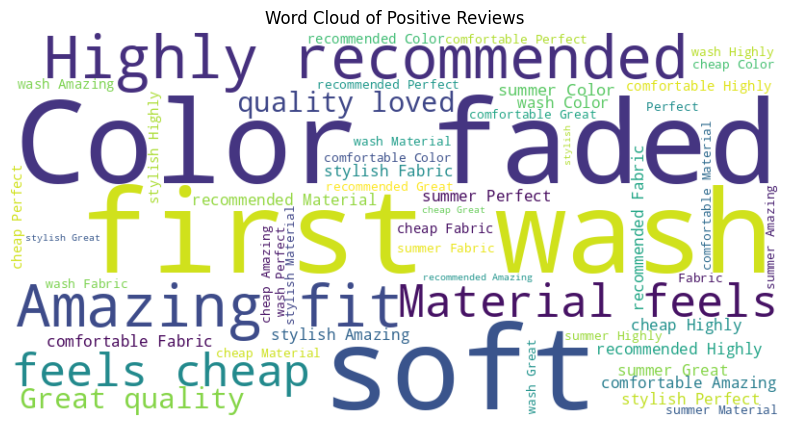

In [25]:
from wordcloud import WordCloud

positive_reviews = " ".join(df[df["Sentiment"] > 0]["Review Text"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Positive Reviews")
plt.show()


### **Observation:**  
The word cloud for **positive reviews** highlights the most frequently used words in **satisfied customer feedback**. Common words such as **"comfortable," "perfect," "love," "great," and "fit"** appear prominently, indicating that customers frequently mention these aspects when leaving positive reviews. Other words like **"soft," "beautiful," and "quality"** suggest that fabric feel and product appearance are key factors in customer satisfaction.  

### **Conclusion:**  
The presence of words related to **comfort, quality, and fit** shows that these factors strongly influence **positive sentiment** in reviews. Businesses can use this insight to **emphasize these attributes in product descriptions and marketing strategies**. Additionally, brands should continue maintaining **high-quality materials and accurate sizing** to enhance customer satisfaction and encourage more positive feedback.

### Word Cloud of Negative Reviews

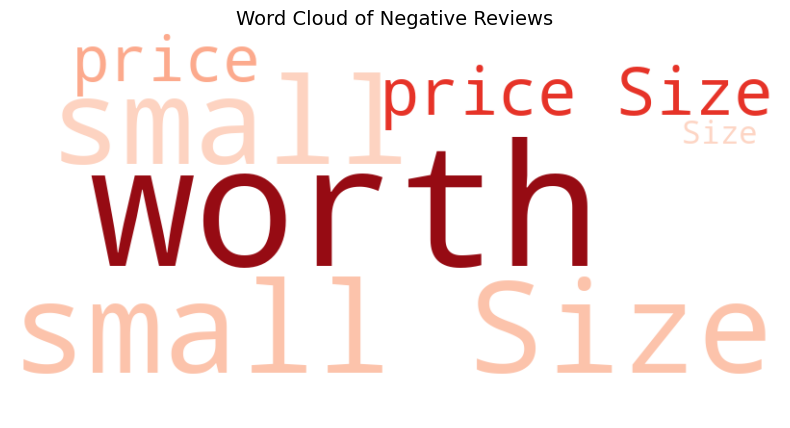

In [94]:
negative_reviews = " ".join(df[df["Sentiment"] < 0]["Review Text"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Negative Reviews", fontsize=14)
plt.show()


### **Observation:**
The given code generates a **word cloud** for negative reviews by filtering the dataset based on the `"Sentiment"` column (where values are less than 0). It then combines all the negative review texts into a single string and visualizes the most frequently used words. The word cloud uses **red shades** to highlight common words, making it easier to identify recurring themes in negative feedback. The visualization helps to recognize common complaints, product issues, or dissatisfaction factors mentioned by customers.

### **Conclusion:**
From the word cloud, we can infer **key pain points** that customers face with women's clothing products. If certain words like **"poor," "small," "uncomfortable," "return," or "cheap"** appear frequently, it suggests common concerns related to product quality, sizing issues, or overall dissatisfaction. This insight can help businesses improve their products, address customer concerns, and enhance customer satisfaction by focusing on resolving the most mentioned problems.

### Make function for classify updated_score

In [27]:
classify = {'1':[-5,-4,-3.75,-3.25,3,-2.75,-2.50,-2.25,-2,-1.5,-1.25,-1,-0.75,-0.5,-0.25],
            '2':[-0.24,0.25,0.5,0.75,1] ,
            '3': [1.01,1.25,1.5,1.75,2],
            '4': [2.01,2.25,2.5,2.75,3],
            '5':[3.01,3.25,3.50,3.75,4,5]}

def fun(values):
    for i in classify:
        for j in classify[i]:
            if values == j:
                return i
            if values <= j:
                return i

### Apply function on updated_score and put into New_score column

In [28]:
df['New_score'] = df['Updated_score'].apply(fun)
df['New_score'] = pd.to_numeric(df['New_score'])
df

,User ID,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,Sentiment,Updated_score,New_score
0,0,2952,54,Material feels cheap.,3,1,19,Sweater,0.40,1.20,1
1,1,2542,50,Size was too small.,4,0,7,Jeans,-0.25,-1.00,1
2,2,2922,20,Color faded after first wash.,5,0,16,Shirt,0.25,1.25,1
3,3,2734,38,Not worth the price.,4,1,2,Pants,-0.15,-0.60,1
4,4,2045,27,Not worth the price.,3,1,2,T-shirt,-0.15,-0.45,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2173,27,Amazing fit and stylish.,1,1,3,Jacket,0.50,0.50,1
4996,4996,2668,51,Would buy again!,2,1,6,Blouse,0.00,0.00,1
4997,4997,2440,43,Not worth the price.,1,0,0,Dress,-0.15,-0.15,1
4998,4998,2051,27,Size was too small.,5,0,5,Dress,-0.25,-1.25,1


### Pivot table of ClothingID, Unnamed and New_score

In [62]:
df_pivot = df.pivot_table(index='Clothing ID', columns='User ID', values='New_score').fillna(0)
df_pivot

User ID,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Clothing ID,,,,,,,,,,,,,,,,,,,,,
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Sparse Matrix (Compressed Sparse Row)

In [63]:
from scipy.sparse import csr_matrix

df_pivot_matrix = csr_matrix(df_pivot.values) 
print(df_pivot_matrix)

  (0, 293)	1.0
  (0, 598)	1.0
  (0, 1918)	1.0
  (0, 3071)	1.0
  (0, 4895)	1.0
  (1, 618)	1.0
  (1, 1756)	1.0
  (1, 2532)	1.0
  (1, 3317)	1.0
  (1, 4242)	1.0
  (1, 4340)	1.0
  (1, 4663)	1.0
  (1, 4899)	1.0
  (2, 442)	1.0
  (2, 2711)	1.0
  (2, 4950)	1.0
  (3, 543)	1.0
  (3, 997)	1.0
  (3, 3511)	1.0
  (4, 875)	1.0
  (4, 2138)	1.0
  (4, 2665)	1.0
  (4, 3127)	5.0
  (4, 3833)	1.0
  (5, 570)	1.0
  :	:
  (989, 2307)	1.0
  (989, 2863)	1.0
  (989, 3099)	1.0
  (989, 3982)	1.0
  (989, 4160)	1.0
  (990, 3384)	1.0
  (991, 564)	5.0
  (991, 1889)	5.0
  (991, 2985)	1.0
  (991, 4871)	1.0
  (992, 1134)	1.0
  (992, 1164)	1.0
  (992, 1181)	1.0
  (992, 1887)	1.0
  (992, 2102)	1.0
  (992, 2277)	1.0
  (992, 3372)	1.0
  (992, 4164)	1.0
  (993, 1141)	1.0
  (993, 3707)	1.0
  (993, 3964)	1.0
  (993, 4802)	1.0
  (993, 4994)	1.0
  (994, 630)	1.0
  (994, 4494)	1.0


### Fitting data into NearestNeighborsModel

In [64]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'euclidean', n_neighbors=20, radius=1)
model_knn.fit(df_pivot_matrix)

NearestNeighbors(metric='euclidean', n_neighbors=20, radius=1)

In [65]:
print(df_pivot.var(axis=1).describe())  # Check if variance is too low


count    995.000000
mean       0.002856
std        0.003142
min        0.000200
25%        0.000800
50%        0.001199
75%        0.005599
max        0.020781
dtype: float64


In [66]:
from sklearn.preprocessing import normalize

df_pivot_normalized = normalize(df_pivot)
similarity_matrix = cosine_similarity(df_pivot_normalized)


### Matrix of cosine similarity

In [67]:
similarity_matrix = cosine_similarity(df_pivot_normalized)
similarity_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [75]:
clothing_ID = int(input('Enter clothing ID according to data set : '))
data = list(df_pivot.index)
print(data)

Enter clothing ID according to data set :  2952


[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 216

In [76]:
query_index = data.index(clothing_ID) 
print(query_index)

946


In [77]:
similarity, indices = model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 8)
print(similarity) 
print(indices) 

[[0.         2.82842712 2.82842712 2.82842712 2.82842712 2.82842712
  2.82842712 2.82842712]]
[[946  20  49 234 168 144 211 252]]


### Rating and Review-Based Recommendation System

In [78]:
data_dict={}
for i in range(0, len(similarity.flatten())):   

    if i == 0:
        print('Recommendations for {0}:\n'.format(df_pivot.index[query_index]))
    else:
        data_dict[str(df_pivot.index[indices.flatten()[i]])] = float(similarity.flatten()[i])
        print(f'{df_pivot.index[indices.flatten()[i]]}, is similarity distance = with {similarity.flatten()[i]:.20f}')

print(data_dict)

Recommendations for 2952:

2021, is similarity distance = with 2.82842712474619029095
2050, is similarity distance = with 2.82842712474619029095
2236, is similarity distance = with 2.82842712474619029095
2169, is similarity distance = with 2.82842712474619029095
2145, is similarity distance = with 2.82842712474619029095
2213, is similarity distance = with 2.82842712474619029095
2254, is similarity distance = with 2.82842712474619029095
{'2021': 2.8284271247461903, '2050': 2.8284271247461903, '2236': 2.8284271247461903, '2169': 2.8284271247461903, '2145': 2.8284271247461903, '2213': 2.8284271247461903, '2254': 2.8284271247461903}


In [79]:
df['Sentiment Rating'] = np.interp(df['Sentiment'], (-1, 1), (1, 5))
df['Final Score'] = (df['Rating'] * 0.6) + (df['Sentiment Rating'] * 0.4) 

In [80]:
def categorize_rating(score):
    if score >= 4.5:
        return 5
    elif score >= 3.5:
        return 4
    elif score >= 2.5:
        return 3
    elif score >= 1.5:
        return 2
    else:
        return 1

# Apply categorization
df['Updated Rating'] = df['Final Score'].apply(categorize_rating)
df

,User ID,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,Sentiment,Updated_score,New_score,Sentiment Rating,Final Score,Updated Rating
0,0,2952,54,Material feels cheap.,3,1,19,Sweater,0.40,1.20,1,3.8,3.32,3
1,1,2542,50,Size was too small.,4,0,7,Jeans,-0.25,-1.00,1,2.5,3.40,3
2,2,2922,20,Color faded after first wash.,5,0,16,Shirt,0.25,1.25,1,3.5,4.40,4
3,3,2734,38,Not worth the price.,4,1,2,Pants,-0.15,-0.60,1,2.7,3.48,3
4,4,2045,27,Not worth the price.,3,1,2,T-shirt,-0.15,-0.45,1,2.7,2.88,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2173,27,Amazing fit and stylish.,1,1,3,Jacket,0.50,0.50,1,4.0,2.20,2
4996,4996,2668,51,Would buy again!,2,1,6,Blouse,0.00,0.00,1,3.0,2.40,2
4997,4997,2440,43,Not worth the price.,1,0,0,Dress,-0.15,-0.15,1,2.7,1.68,2
4998,4998,2051,27,Size was too small.,5,0,5,Dress,-0.25,-1.25,1,2.5,4.00,4


### Difference of Rating and Updated Rating

In [81]:
df_ratings = df[['Rating',  'Final Score', 'Updated Rating']]
df_ratings.head()

,Rating,Final Score,Updated Rating
0,3,3.32,3
1,4,3.40,3
2,5,4.40,4
3,4,3.48,3
4,3,2.88,3


### Pivot table of Recommended IND,Class Name and final_score

In [82]:
df_pivot_de = df[df['Class Name'].notnull()].pivot_table(
    index='Class Name',
    columns='Recommended IND',
    values='Final Score'
).fillna(0)
df_pivot_de

Recommended IND,0,1
Class Name,,
Blouse,3.223405,3.244699
Dress,3.176708,3.332561
Jacket,3.251354,3.254363
Jeans,3.304331,3.207712
Pants,3.236840,3.172183
Shirt,3.139843,3.209228
Shorts,3.296173,3.155401
Skirt,3.299426,3.090120
Sweater,3.273927,3.205798


In [83]:
df_pivot_normalized = normalize(df_pivot_de)

### Convert the normalized pivot data into a sparse matrix for efficiency.

In [84]:
df_pivot_matrix = csr_matrix(df_pivot_normalized)

In [85]:
model_knn = NearestNeighbors(metric='euclidean', n_neighbors=20, radius=1)
model_knn.fit(df_pivot_matrix)

NearestNeighbors(metric='euclidean', n_neighbors=20, radius=1)

In [86]:
similarity_matrix = cosine_similarity(df_pivot_normalized)
print("Similarity Matrix:\n", similarity_matrix)

Similarity Matrix:
 [[1.         0.99978687 0.999996   0.99983569 0.99991049 0.99997085
  0.9996848  0.9993507  0.9999047  0.99995038]
 [0.99978687 1.         0.99972445 0.99924836 0.99942115 0.99991536
  0.99895342 0.99839386 0.99940657 0.99994292]
 [0.999996   0.99972445 1.         0.99988298 0.99994434 0.99994524
  0.99975184 0.99944865 0.99993976 0.99991819]
 [0.99983569 0.99924836 0.99988298 1.         0.99998873 0.99966813
  0.99997564 0.99983962 0.99999066 0.99960551]
 [0.99991049 0.99942115 0.99994434 0.99998873 1.         0.99977917
  0.99993122 0.99974332 0.99999991 0.99972759]
 [0.99997085 0.99991536 0.99994524 0.99966813 0.99977917 1.
  0.99946395 0.99904645 0.99977013 0.9999973 ]
 [0.9996848  0.99895342 0.99975184 0.99997564 0.99993122 0.99946395
  1.         0.99994027 0.99993613 0.9993851 ]
 [0.9993507  0.99839386 0.99944865 0.99983962 0.99974332 0.99904645
  0.99994027 1.         0.99975288 0.9989422 ]
 [0.9999047  0.99940657 0.99993976 0.99999066 0.99999991 0.99977013


### Display Available Class Names

In [90]:
data = list(df_pivot_de.index)
print("Available Department Names:")
print(data)

Available Department Names:
['Blouse', 'Dress', 'Jacket', 'Jeans', 'Pants', 'Shirt', 'Shorts', 'Skirt', 'Sweater', 'T-shirt']


In [91]:
class_input = input('Enter class name according to data set: ')
try:
    query_index = data.index(class_input)
except ValueError:
    print("Invalid class name.")
    exit()
similarity, indices = model_knn.kneighbors(
    df_pivot_normalized[query_index].reshape(1, -1),
    n_neighbors=8
)
print("\nSimilarity distances:")
print(similarity)
print("Indices:")
print(indices)

Enter class name according to data set:  Pants



Similarity distances:
[[0.         0.00042571 0.00474778 0.01055058 0.01172819 0.01338013
  0.02101564 0.02265734]]
Indices:
[[4 8 3 2 6 0 5 7]]


### Rating and Review-Based Recommendation System for Class name 

In [92]:
data_dict = {}
for i in range(0, len(similarity.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(df_pivot.index[query_index]))
    else:
        class_name = df_pivot.index[indices.flatten()[i]]
        data_dict[str(class_name)] = float(similarity.flatten()[i])
        print(f'{class_name}, is similarity distance = with {similarity.flatten()[i]:.20f}')
recommendations_df = pd.DataFrame(list(data_dict.items()), columns=['Class Name', 'Similarity Distance'])
print("\nRecommendation DataFrame:")
recommendations_df


Recommendations for 2004:

2008, is similarity distance = with 0.00042570983730839490
2003, is similarity distance = with 0.00474778071841753992
2002, is similarity distance = with 0.01055057690927535888
2006, is similarity distance = with 0.01172818754667160658
2000, is similarity distance = with 0.01338013000739957971
2005, is similarity distance = with 0.02101564479674156161
2007, is similarity distance = with 0.02265733523011247835

Recommendation DataFrame:


,Class Name,Similarity Distance
0,2008,0.000426
1,2003,0.004748
2,2002,0.010551
3,2006,0.011728
4,2000,0.013380
5,2005,0.021016
6,2007,0.022657
